Summary Statistics for Categorical and Continuous Features:
                              mode         mean         std    min     max
area_type     Super built-up  Area          NaN         NaN    NaN     NaN
availability         Ready To Move          NaN         NaN    NaN     NaN
location                Whitefield          NaN         NaN    NaN     NaN
size                         2 BHK          NaN         NaN    NaN     NaN
total_sqft                     NaN  1282.827520  376.303943  250.0  2540.0
bath                           NaN     2.393923    0.950267    1.0    15.0
balcony                        NaN     1.562900    0.781248    0.0     3.0
price                          NaN    72.268859   34.446102    8.0   178.0
Cleaned data saved to cleaned_data.csv


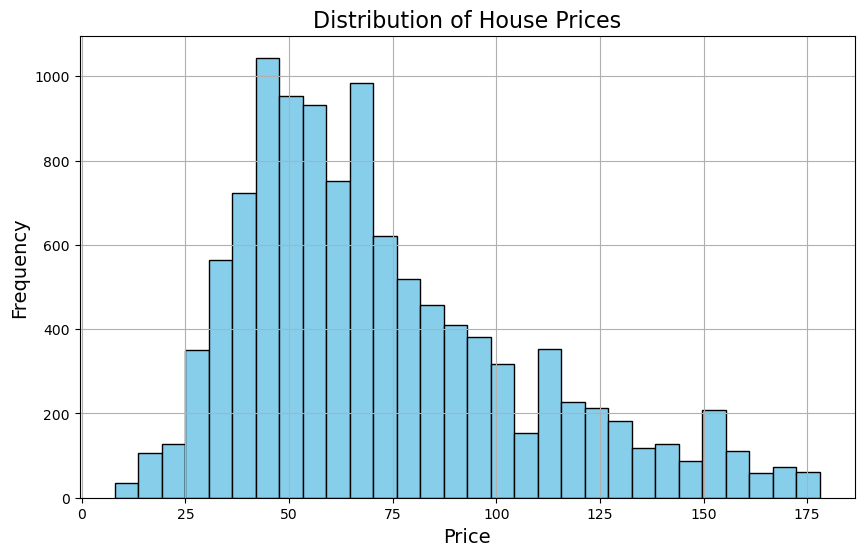

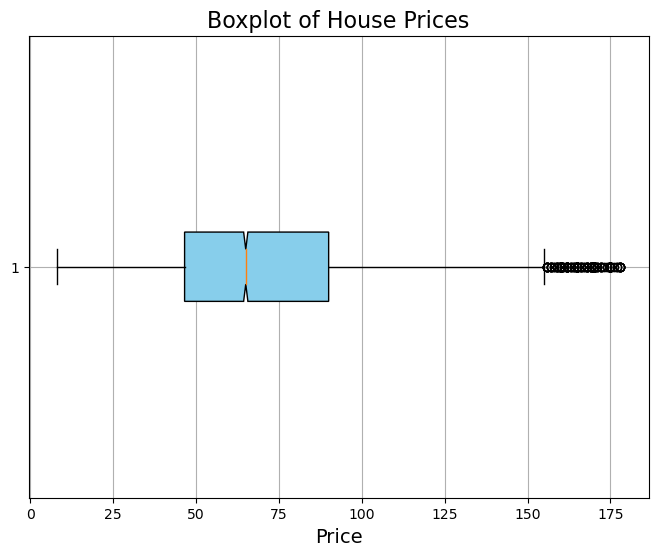

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

# Load the dataset
file_path = "Bengaluru_House_Data2.csv"  # Update as needed
df = pd.read_csv(file_path)

# Define feature categories
categorical_features = ["area_type", "availability", "location", "size"]
continuous_features = ["total_sqft", "bath", "balcony", "price"]

# Fill missing values for categorical features with mode
for col in categorical_features:
    df[col] = df[col].fillna(df[col].mode()[0])

# Convert 'total_sqft' to numerical format
def convert_sqft(value):
    if isinstance(value, str) and " - " in value:
        try:
            low, high = map(float, value.split(" - "))
            return round((low + high) / 2, 2)
        except ValueError:
            return np.nan
    else:
        try:
            return round(float(value), 2)
        except ValueError:
            return np.nan

if "total_sqft" in df.columns:
    df["total_sqft"] = df["total_sqft"].apply(convert_sqft)
    df["total_sqft"] = df["total_sqft"].fillna(df["total_sqft"].mean())  # Fill missing with mean

# Fill missing values for continuous features
df["bath"] = df["bath"].fillna(df["bath"].median())
df["balcony"] = df["balcony"].fillna(df["balcony"].median())
df["price"] = df["price"].fillna(df["price"].mean())  # Fill missing price with mean

# Remove outliers for continuous features
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

df = remove_outliers(df, "total_sqft")
df = remove_outliers(df, "price")

# Describe categorical features (using mode for categorical features)
categorical_summary = df[categorical_features].mode().T  # Transpose for better readability
categorical_summary.columns = ['mode']  # Rename for clarity

# Describe continuous features using mean, std, min, max
continuous_summary = df[continuous_features].describe().T[['mean', 'std', 'min', 'max']]

# Combine both summaries
final_summary = pd.concat([categorical_summary, continuous_summary], axis=0)

# Display the summary statistics
print("Summary Statistics for Categorical and Continuous Features:")
print(final_summary)

# Save cleaned dataset
df.to_csv("cleaned_data.csv", index=False)
print("Cleaned data saved to cleaned_data.csv")

# Visualize the distribution of the 'price' label
plt.figure(figsize=(10, 6))
plt.hist(df['price'], bins=30, edgecolor='k', color='skyblue')
plt.title('Distribution of House Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(True)
plt.show()

# You can also visualize the price using a boxplot if you prefer:
plt.figure(figsize=(8, 6))
plt.boxplot(df['price'], vert=False, patch_artist=True, notch=True, boxprops=dict(facecolor='skyblue', color='black'))
plt.title('Boxplot of House Prices', fontsize=16)
plt.xlabel('Price', fontsize=14)
plt.grid(True)
plt.show()
